<a href="https://colab.research.google.com/github/sharna33/CSE_4106_Digital-Image-Processing/blob/main/CSE_4106_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Histogram Equalization**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

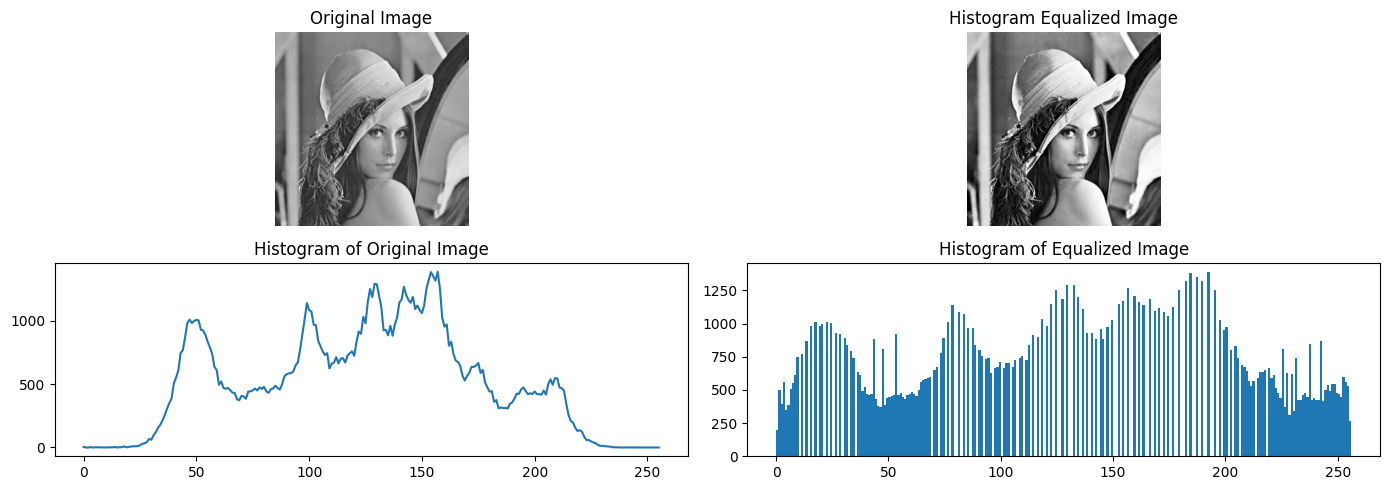

In [4]:
original_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CSE 4106/LAB 3/Copy of lena_gray.jpg', cv2.IMREAD_GRAYSCALE)

height, width = original_img.shape
pixel_count = height * width

intensity_hist = np.zeros(256, dtype=int)
for x in range(height):
    for y in range(width):
        pixel_val = original_img[x, y]
        intensity_hist[pixel_val] += 1

prob_density = intensity_hist / pixel_count

cum_density = np.cumsum(prob_density)

mapped_vals = np.round(cum_density * 255).astype(np.uint8)

equalized_img = np.zeros((height, width), dtype=np.uint8)
for x in range(height):
    for y in range(width):
        old_val = original_img[x, y]
        equalized_img[x, y] = mapped_vals[old_val]

# Plotting section
plt.figure(figsize=(14, 5))

plt.subplot(2, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.axis('off')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')
plt.title("Histogram Equalized Image")

plt.subplot(2, 2, 3)
plt.plot(intensity_hist)
plt.title("Histogram of Original Image")

plt.subplot(2, 2, 4)
plt.hist(equalized_img.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Equalized Image")

plt.tight_layout()
plt.show()